In [52]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [40]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [41]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1002040051.npz
(300, 64, 64, 3)


In [33]:

plot_model(vae.full_model, to_file='./vae/model.png', show_shapes=True)

KeyboardInterrupt: 

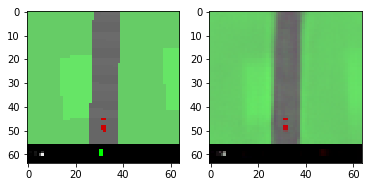

In [34]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

In [99]:

obs = obs_data[100]

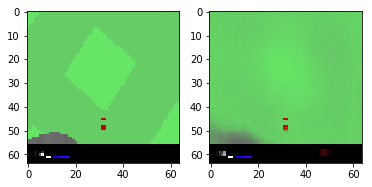

In [100]:
### output from the full_model
reconstruction = vae.full_model.predict(np.array([obs]))[0]

plt.subplot(121)
plt.imshow( obs)
plt.subplot(122)
plt.imshow( reconstruction)

In [46]:
encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

z = [ 0.6445 -0.5652  0.84    0.2259  0.917   0.8561  0.5445 -0.6614 -1.2175
  0.8121 -1.3822 -0.8246  0.0443  1.7548  1.2727 -1.4403 -0.4555 -0.2714
 -0.6275 -1.1167 -0.2777  0.3653  1.1896 -0.6958 -1.5738 -0.6946 -0.1197
  0.6942  0.7184 -1.0161  0.3881  0.0744]


In [47]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

mu = [ 0.461   0.2408  0.9884  0.0459  0.9623  1.0147  0.6555 -0.586  -0.4304
 -0.0892 -1.5475  0.0319  0.426   0.1936  0.0838 -0.9127 -0.0823 -0.0321
  0.0829 -0.2372 -0.1084 -0.0069  0.011  -0.0201 -1.735  -0.8933  0.0082
  0.5342  0.1982  0.056  -0.0389  0.0389]
log_var = [-1.8887 -0.1232 -2.1576  0.0093 -5.2961 -2.2058 -3.0662 -3.1458  0.0018
 -0.0412 -3.1433  0.0278 -0.0169  0.0186 -0.0313 -0.8884 -0.0468 -0.0565
  0.0075  0.0149 -0.0285 -0.0013 -0.006  -0.0468 -3.2442 -3.9082  0.0348
 -2.0272 -0.0264 -0.0202 -0.0585 -0.0103]


array([ 0,  2,  4,  5,  6,  7, 10, 15, 24, 25, 27])

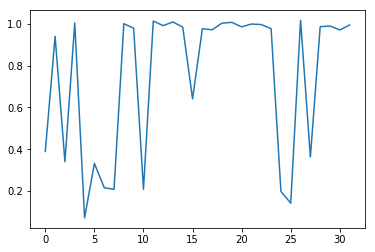

In [50]:
plt.plot(np.exp(log_var/2))
hot_zs = np.where(np.exp(log_var/2) < 0.9)[0]
hot_zs

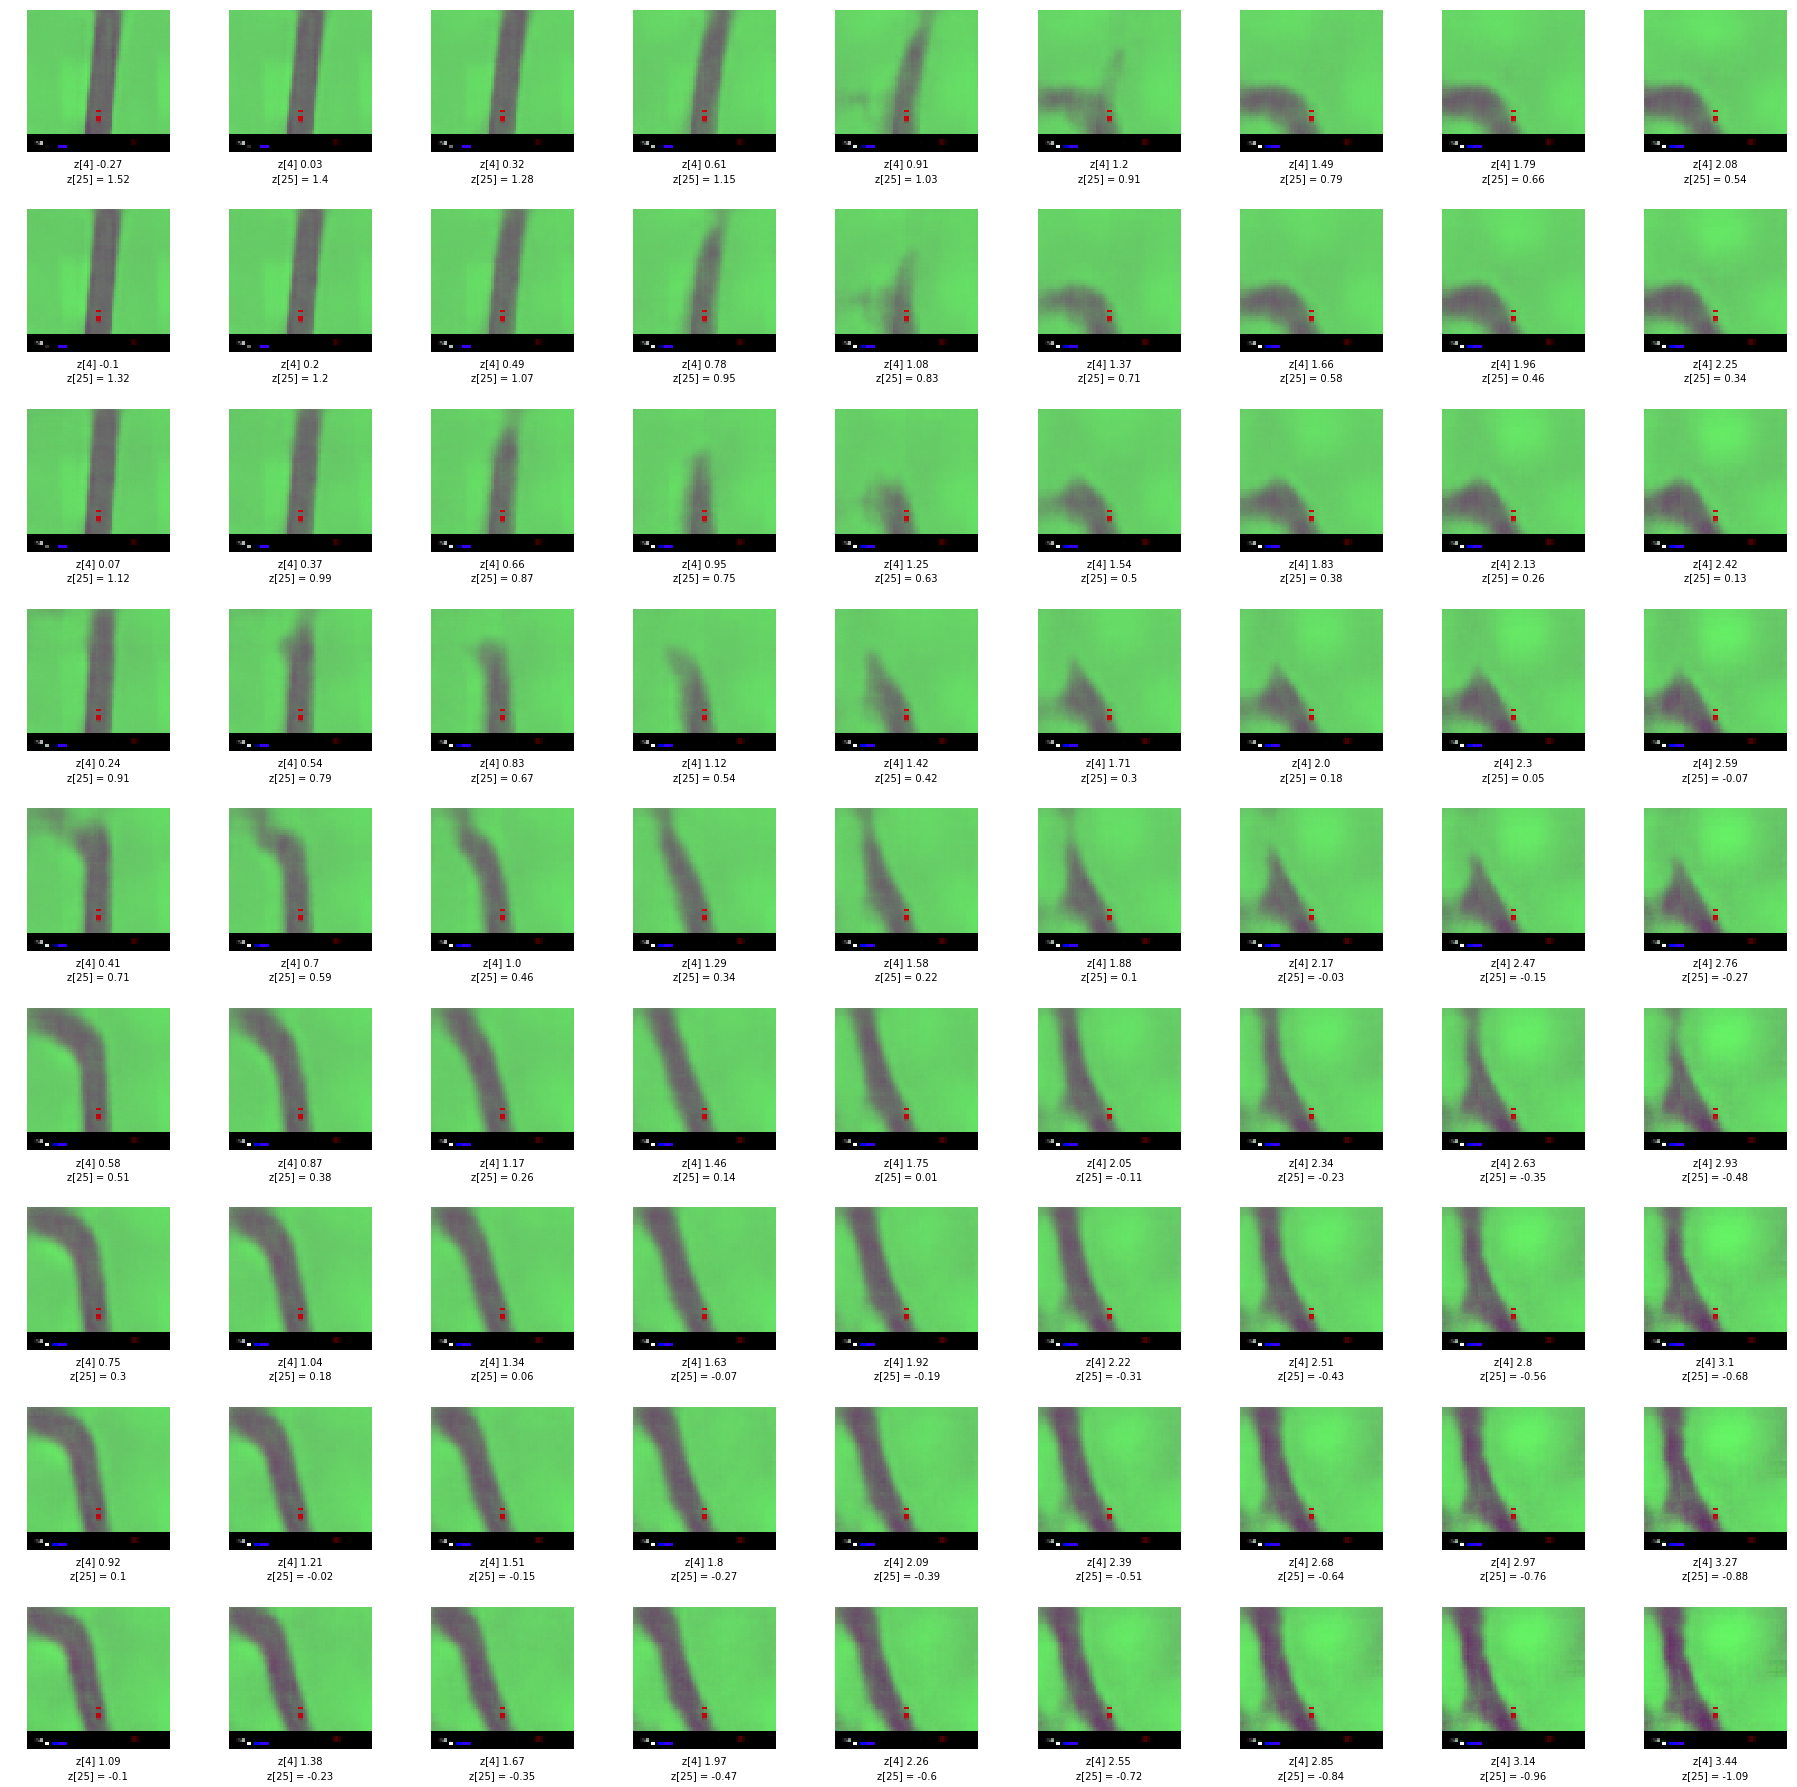

In [111]:
file1 = os.listdir(DIR_NAME)[200]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[260]
obs_data2 = np.load(DIR_NAME + file)['obs']

top_left = vae.encoder.predict(np.array([obs_data1[20]]))[0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[0]
# top_left = vae.encoder.predict(np.array([obs_data[20]]))[0]

fig, axes = plt.subplots(nrows=9, ncols=9, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(9):
    for y in range(9):
        
#         z = top_left.copy()

        z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
#         z[7] = (bottom_left - top_left) + (y-4)/2
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[4] ' + str(np.round(z[4],2)), size=10, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[25] = ' + str(np.round(z[7],2)), size=10, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [82]:

def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=0.6830157041549683, description='z0', max=3.0, min=-3.0), FloatSlider(…

<function __main__.play_with_z>